<a href="https://colab.research.google.com/github/YahyaHajji/Ardouino-Servo-Motor-Control/blob/master/AI_ANN_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import Required Libraries

In [11]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.19.0


Step 2: Load and Explore the MNIST Dataset

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


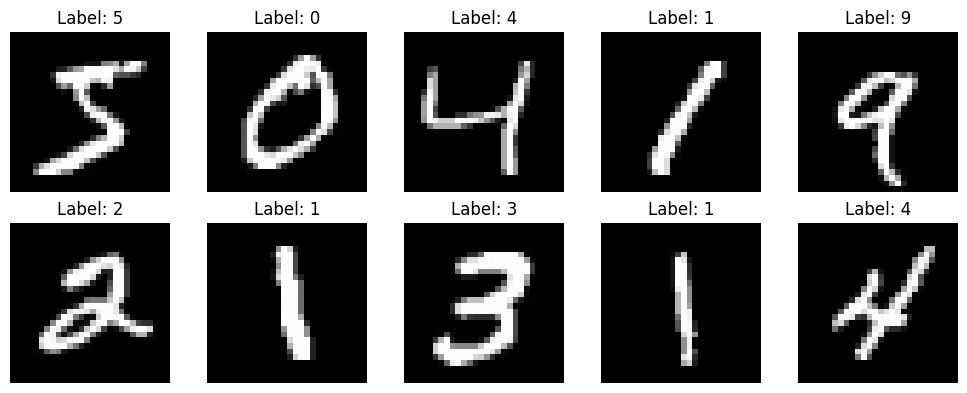

In [12]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Check the shapes
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# Visualize some samples
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Step 3: Normalize the Data

In [13]:
# Normalize pixel values from [0, 255] to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

print(f"Min value after normalization: {x_train.min()}")
print(f"Max value after normalization: {x_train.max()}")

Min value after normalization: 0.0
Max value after normalization: 1.0


Step 4: Build the Neural Network Model

In [14]:
# Create a Sequential model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28×28 images to 784-length vectors
    Dense(128, activation='relu'),   # Hidden layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer (10 classes: 0-9)
])

# Display model architecture
model.summary()

In [15]:
# Compile the model
model.compile(
    optimizer='adam',                          # Optimization algorithm
    loss='sparse_categorical_crossentropy',    # Loss function for multi-class
    metrics=['accuracy']                       # Track accuracy
)

In [16]:
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test),
    batch_size=32,
    verbose=1
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9885 - loss: 0.0363 - val_accuracy: 0.9758 - val_loss: 0.0803
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9925 - loss: 0.0246 - val_accuracy: 0.9764 - val_loss: 0.0825
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9946 - loss: 0.0188 - val_accuracy: 0.9761 - val_loss: 0.0770
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9954 - loss: 0.0161 - val_accuracy: 0.9791 - val_loss: 0.0747
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9954 - loss: 0.0145 - val_accuracy: 0.9767 - val_loss: 0.0889


In [17]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")


✅ Test Accuracy: 0.9767 (97.67%)
Test Loss: 0.0889


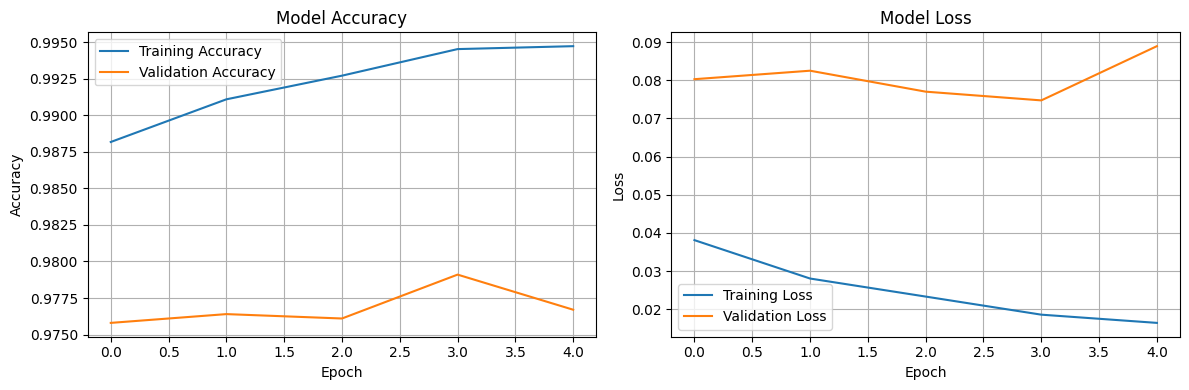

In [18]:
# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


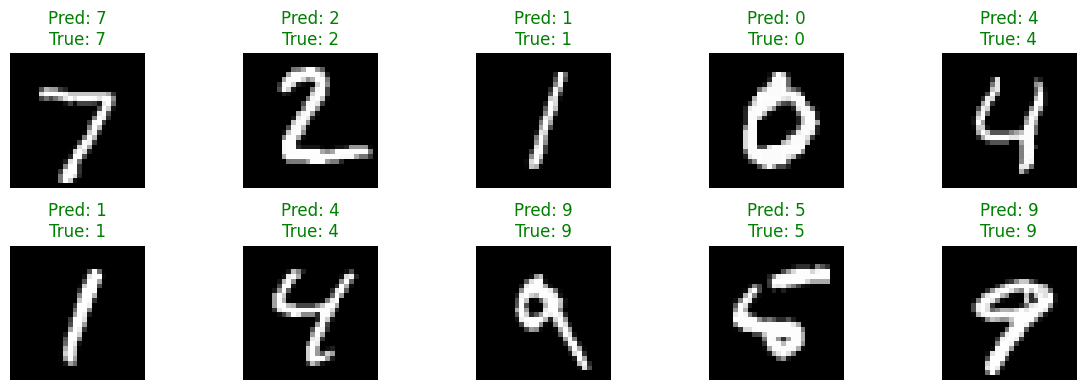

In [19]:
# Make predictions on test set
predictions = model.predict(x_test[:10])

# Visualize predictions
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    color = 'green' if predicted_label == true_label else 'red'
    plt.title(f"Pred: {predicted_label}\nTrue: {true_label}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()